In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/raks_rgb2nir"

NIR  result  RGB  test


In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import os
from tqdm import tqdm

Size = 256
c=d=0
img_data = []
path=''
path1 = '/content/drive/MyDrive/raks_rgb2nir/RGB'
files = os.listdir(path1)
for i in tqdm(files):
    img = cv2.imread(path1 + '/' + i, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (Size, Size))
    img_data.append(img_to_array(img))
    # c=c+1
    # if(c==200):
    #   break
# img = cv2.imread('/home/netrunner/Desktop/Raks/val_256/458_c.tiff',1)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img,(Size,Size))
# img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), Size, Size, 3))
img_array = img_array.astype('float32')/255.

img_data2 = []

path2 ='/content/drive/MyDrive/raks_rgb2nir/NIR'
files = os.listdir(path2)
for i in tqdm(files):
    img = cv2.imread(path2+'/'+i,1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    n_img = np.stack((img,)*3, axis=-1)

    n_img = cv2.resize(n_img, (Size, Size))
    img_data2.append(img_to_array(n_img))
    # d=d+1
    # if(d==200):
    #   break
# img2 = cv2.imread('/home/netrunner/Desktop/Raks/val_256/458.tiff',1)
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# img2 = cv2.resize (img2,(Size,Size))
# img_data2.append(img_to_array(img2))

img_array2 = np.reshape(img_data2, (len(img_data2), Size, Size, 3))
img_array2 = img_array2.astype('float32')/255.

100%|██████████| 115/115 [00:00<00:00, 149.76it/s]


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same', input_shape = (Size, Size, 3)))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
# model.add(Conv2D(512, (3, 3), activation = 'relu', padding = 'same'))
# model.add(Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))

model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
# model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
# model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# model.add(UpSampling2D((2, 2)))
# model.add(Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
# model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

# model.add(UpSampling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
# model.add(UpSampling2D((2,2)))
# model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
# model.add(UpSampling2D((2,2)))
model.add(Conv2D(3, (3, 3), activation = 'relu', padding = 'same'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
model.summary()

model.fit(img_array, img_array2, epochs = 100, batch_size = 20, validation_split=0.1, verbose = 1)

model.save('/content/drive/MyDrive/Copy of val_256/Raks_model_colorization.model') 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 128)     73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 128)     147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 256)     295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 256, 256, 256)     590080    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 256, 256, 256)     590080    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 256, 256, 128)     2

In [ ]:
img_data3 = []

img3 = cv2.imread('/content/drive/MyDrive/raks_rgb2nir/test/92_0_rgb.jpg', 1)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3, (Size, Size))
img_data3.append(img_to_array(img3))

img_array3 = np.reshape(img_data3, (len(img_data3), Size, Size, 3))
img_array3 = img_array3.astype('float32')/255.

Output


True

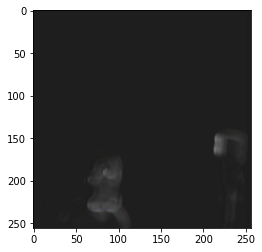

In [ ]:
print("Output")
output = model.predict(img_array3)
output2=output[0].reshape(Size, Size, 3)
output2=output2*255
output2=output2.astype(np.uint8)
imshow(output2)
cv2.imwrite('/content/drive/MyDrive/raks_rgb2nir/result/92_0_64_128x2_256x3_128_64_100.png', output2)